Importing the Dependencies

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Data Collection and Analysis

PIMA Diabetes Dataset

In [45]:

# Load the dataset
data = pd.read_csv('/Users/sujal/Downloads/Autism Screening.csv')

# Check basic information
print(data.head())
print(data.info())
print(data.describe())


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice austim  \
0         1         0          0  ...      f  White-European      no     no   
1         1         0          1  ...      m          Latino      no    yes   
2         1         1          1  ...      m          Latino     yes    yes   
3         1         0          1  ...      f  White-European      no    yes   
4         1         0          0  ...      f               ?      no     no   

     contry_of_res used_app_before result       age_desc relation Class/AS

In [46]:
# printing the first 5 rows of the dataset
autism_dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Outcome
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NaN
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NaN
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,NaN
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NaN
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NaN


In [47]:
# number of rows and Columns in this dataset
# Check for missing values
print(data.isnull().sum())

# Drop rows with too many missing values or fill missing ones
data = data.dropna()  # Or use data.fillna(data.mean())


A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [49]:

# Initialize LabelEncoder
label_enc = LabelEncoder()

# Encode categorical variables
categorical_cols = ['gender', 'ethnicity', 'jundice', 'austim', 
                     'used_app_before', 'relation', 'contry_of_res']

for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col].astype(str))


In [50]:
# Define X and y
X = data.drop(columns=['Class/ASD', 'age_desc', 'result'])  # Drop irrelevant columns
y = data['Class/ASD']  # Target variable

# Encode target variable
y = label_enc.fit_transform(y)  # YES=1, NO=0


0 --> Not with ASD

1 --> With ASD

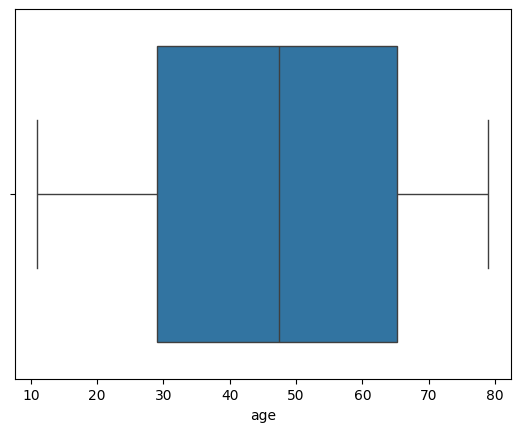

    age
0    21
1    61
2    28
3    68
4    39
..  ...
95   29
96   35
97   61
98   44
99   53

[100 rows x 1 columns]


In [53]:
# Plot boxplot for age or other numeric variables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Data (Replace this with your actual dataset)
data = pd.DataFrame({'age': np.random.randint(10, 80, 100)})

# Plot boxplot
sns.boxplot(x=data['age'])  # Corrected argument
plt.show()

# Remove outliers using IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Filtering data
filtered_data = data[~((data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR)))]

# Reset index after filtering
filtered_data = filtered_data.reset_index(drop=True)

print(filtered_data)





In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Convert X_train to DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)  
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)  

# Check data types before scaling
print("Data types before processing:\n", X_train.dtypes)
print("\nFirst few rows of X_train:\n", X_train.head())

# Identify non-numeric columns
non_numeric = X_train.select_dtypes(include=['object']).columns
print("\nNon-numeric columns:", non_numeric.tolist())

# Convert non-numeric columns to numeric (replace errors with NaN)
for col in non_numeric:
    print(f"\nUnique values in {col}:", X_train[col].unique()[:10])
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Check for missing values
print("\nMissing values per column before filling:\n", X_train.isnull().sum())

# Fill missing values with column mean
X_train.fillna(X_train.mean(numeric_only=True), inplace=True)
X_test.fillna(X_test.mean(numeric_only=True), inplace=True)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nData preprocessing completed successfully!")


Data types before processing:
 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
dtype: object

First few rows of X_train:
          0         1         2         3         4         5         6   \
0  0.631666  1.091516  1.075961  1.012557 -1.023448 -0.612372 -0.836660   
1 -1.583114 -0.916157 -0.929402 -0.987599 -1.023448 -0.612372  1.195229   
2  0.631666 -0.916157  1.075961  1.012557  0.977089  1.632993  1.195229   
3  0.631666  1.091516 -0.929402  1.012557  0.977089 -0.612372 -0.836660   
4 -1.583114  1.091516 -0.929402 -0.987599  0.977089  1.632993 -0.836660   

         7         8         9         10        11        12        13  \
0  0.724194 -0.701442 -1.164965  0.719098  0.980581  0.193926 -0.339571   
1  0.724194 -0.701442  0.858395 -0.119252 -1.019804  0.572994 -0.339571  

In [62]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [71]:
import pandas as pd

X_train = pd.DataFrame(X_train)  # Convert back to DataFrame if needed
y_train = y_train[:X_train.shape[0]]  # Ensure both have the same number of rows
print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training successful!")



Final X_train shape: (561, 18)
Final y_train shape: (561,)
Model training successful!


In [72]:
# Make predictions
y_pred = model.predict(X_test)



Accuracy: 98.58%


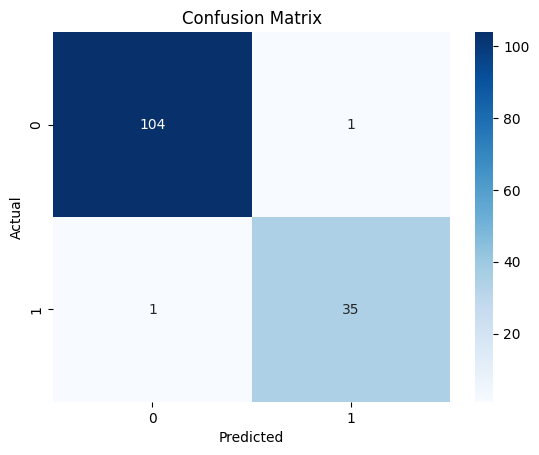

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.97      0.97      0.97        36

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141



In [73]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [74]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [75]:
import joblib

# Save model
joblib.dump(model, 'autism_model.pkl')

# Load model
loaded_model = joblib.load('autism_model.pkl')


In [80]:
print("Number of features expected:", X_train.shape[1])


Number of features expected: 18


In [81]:
import numpy as np

def make_prediction(input_data, scaler, model):
    try:
        # Convert input data to numpy array
        input_data_as_numpy_array = np.asarray(input_data, dtype=float)

        # Check if input length matches expected features
        if input_data_as_numpy_array.shape[0] != X_train.shape[1]:
            return f"Error: Expected {X_train.shape[1]} features, but got {input_data_as_numpy_array.shape[0]}."

        # Reshape the array for a single instance
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

        # Standardize the input data
        std_data = scaler.transform(input_data_reshaped)

        # Make prediction
        prediction = model.predict(std_data)

        # Interpret the result
        return (
            "The person is not with Autism Spectrum Disorder"
            if prediction[0] == 0
            else "The person is with Autism Spectrum Disorder"
        )

    except Exception as e:
        return f"Error during prediction: {str(e)}"

# Example input data (Ensure 18 features)
example_input = (0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0)  # Adjusted to 18 values

# Call the function with the trained scaler and model
result = make_prediction(example_input, scaler, model)
print(result)


The person is not with Autism Spectrum Disorder


In [84]:
import joblib

# Save the model and scaler
joblib.dump(model, 'autism_model.pkl')       # Save the trained model
joblib.dump(scaler, 'scaler.pkl')            # Save the scaler

print("Model and scaler saved!")


Model and scaler saved!
